In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from root_numpy import root2array
import Constants as C
from WeightTool import WeightTool
from matplotlib.colors import LogNorm
from Loader import Loader

from PlotTool import PlotTool
from Cuts import qratio, getQAB, qlayerCut

savedir = '../plots/ehealert_updatedbaseline/'

In [2]:
# Create the loader with the base selection
loader = Loader(C.basesel)

dt_data = loader.getData()
dt_numu = loader.getNuMu()
dt_nue  = loader.getNuE()
dt_cor  = loader.getCorsika()
#dt_hecor = loader.getVHECorsika()


0.680205771132 178839.725705
0.732396948729 57817.6091053


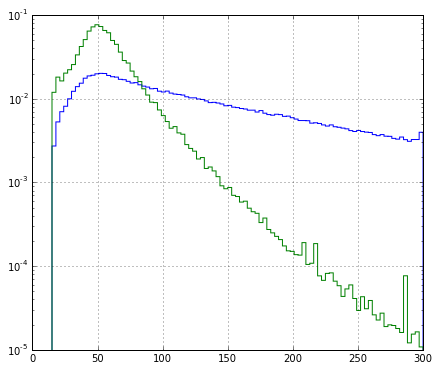

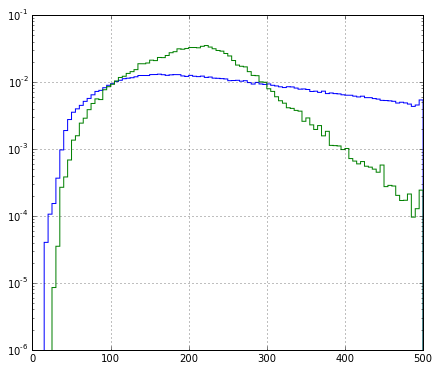

In [4]:
# Playin around with where to place the new ndom cut..

numu_pev = dt_numu[ np.log10(dt_numu.PrimaryNeutrinoEnergy) >=6 ]
other    = dt_cor

fig, ax = plt.subplots(ncols=1,figsize=(7,6))
numu_pev['ndoms_5pe'].hist(weights=numu_pev.wE2.as_matrix()/sum(numu_pev.wE2),
                           bins=100,range=(0,300),histtype='step')
other['ndoms_5pe'].hist(weights=other.w.as_matrix()/sum(other.w),
                           bins=100,range=(0,300),histtype='step')
ax.set_yscale('log')

fig, ax = plt.subplots(ncols=1,figsize=(7,6))
numu_pev['hm_nhit_doms'].hist(weights=numu_pev.wE2.as_matrix()/sum(numu_pev.wE2),
                           bins=100,range=(0,500),histtype='step')
other['hm_nhit_doms'].hist(weights=other.w.as_matrix()/sum(other.w),
                           bins=100,range=(0,500),histtype='step')
ax.set_yscale('log')

print sum( numu_pev[ numu_pev.hm_nhit_doms > 300].wE2 ), sum(other[ other.hm_nhit_doms>300 ].w)
print sum( numu_pev[ numu_pev.ndoms_5pe > 120].wE2 ), sum(other[ other.ndoms_5pe > 120].w)

In [3]:
# For this analysis we don't have so much selection but we 
# should demonstrate good agreement for each layer of cuts

# Now that the data is loaded, put everything into an info object
dt_mc = pd.concat([dt_cor, dt_nue, dt_numu])

def getinfo(data, mctot, cor, nue, numu):

    return {'data' : [data, mctot, cor, nue, numu, nue, numu],
            'names'    : ['Data',
                          'Total Bkg.', 
                          r'Atmos. $\mu$',
                          r'Atmos. $\nu_{e}$', 
                          r'Atmos. $\nu_{\mu}$',
                          r'Astro. $\nu_{e}$',
                          r'Astro. $\nu_{\mu}$'],
            'weights' : ['w','w','w','w','w', 'wE2', 'wE2'], 
            'colors'  : ['black', 'r', 'm', 'g', 'b', 'y','c'],
            'lw'      : [0, 1.5, 1.5, 1.5, 1.5,1.5,1.5],
            'ls'      : ['solid','dashed','solid','solid','solid','solid','solid'],
            'marker'  : ['.',' ', ' ', ' ', ' ',' ',' ']
    }
    
info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)

In [4]:
# Initialize the plot tool
p_tool = PlotTool()

# Now drop in some stacked plots that we want to understand
variables = {'log10(hs_q_tot_pulses)' : [40, 3, 7, 'logqtot','log10(NPE)'],
             'log10(NPE)'     : [40, 3, 7, 'lognpe','log10(NPE) (portia)'],
             'cos(ImpLF_zen)' : [30, -1, 1, 'coszen', r'cos($\theta$)'],
             'hm_nhit_doms'   : [50,0,1500, 'hitdoms', r'N Hit Doms'],
             'ndoms_5pe'      : [50,0,1500, 'hitdoms5pe', r'N Hit Doms (>5pe)'],
             #'hm_nhit_strings': [60,0,60,'hitstrings','N Hit Strings'],
             'nstr_2ndway_5pe': [60,0,60,'hitstrings5pe', r'N Hit Strings (>5pe)'],
             'Nch'            : [50,0,1500, 'Nch', 'N Channel (portia)'],
             'ImpLF_rchi2' : [50,0,500,'rchi2',r'Reduced $\chi^{2}$'],
            }

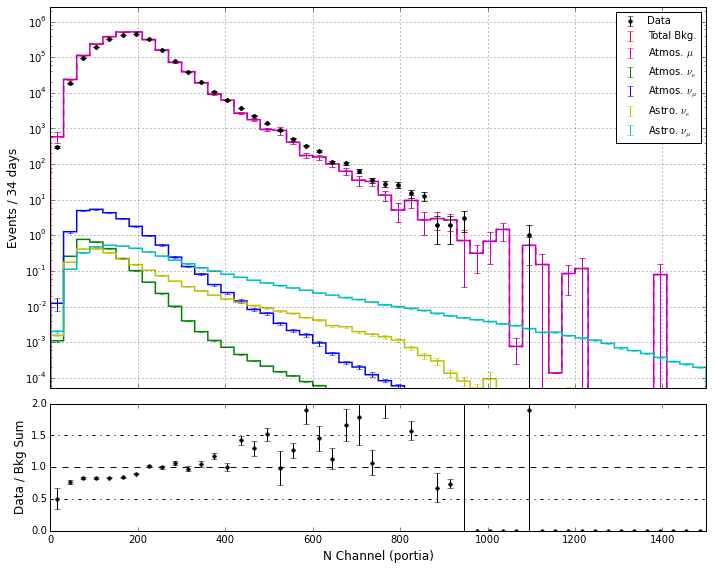

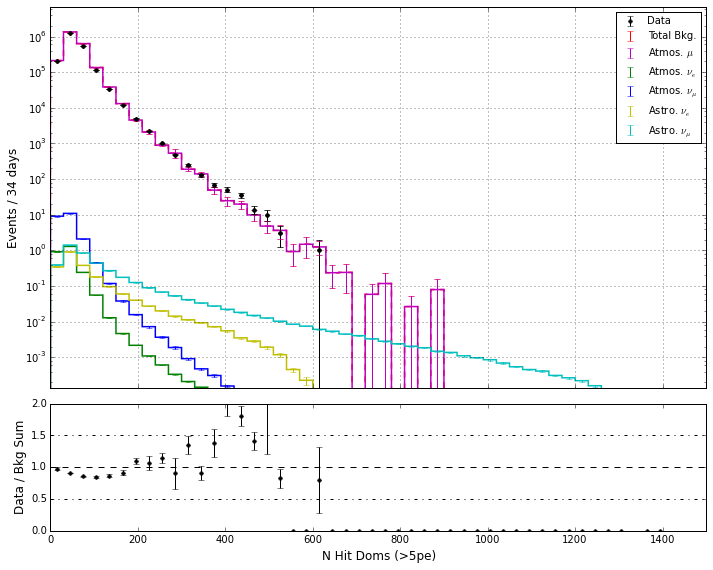

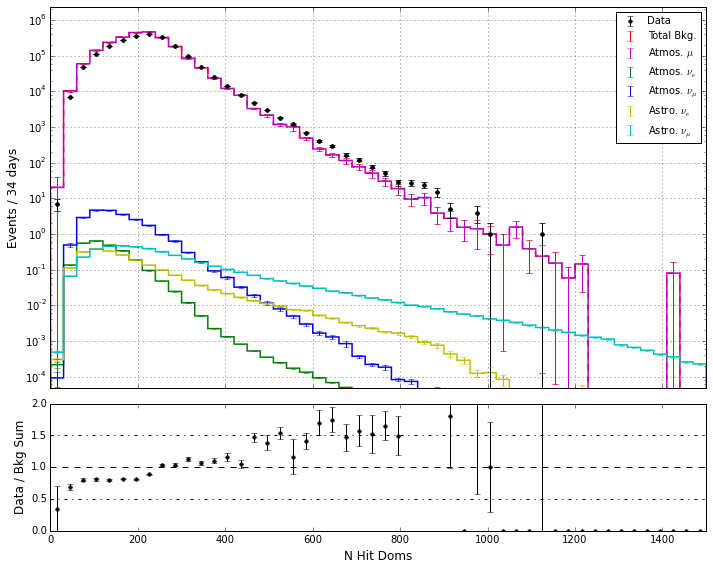

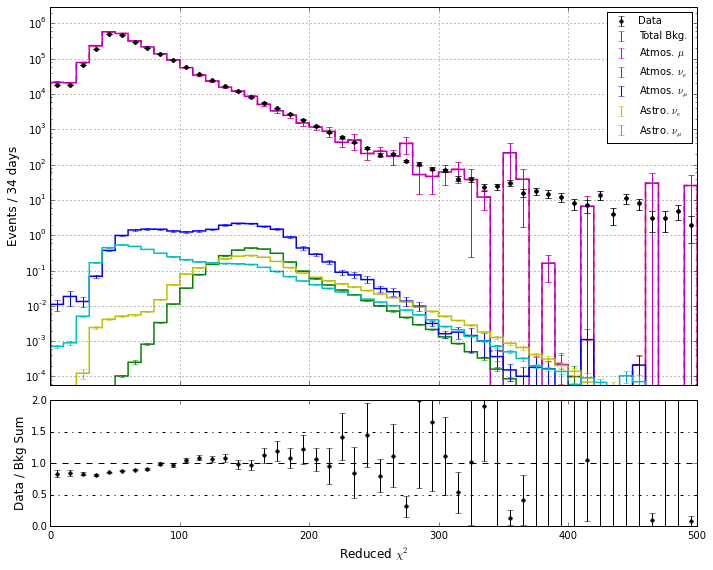

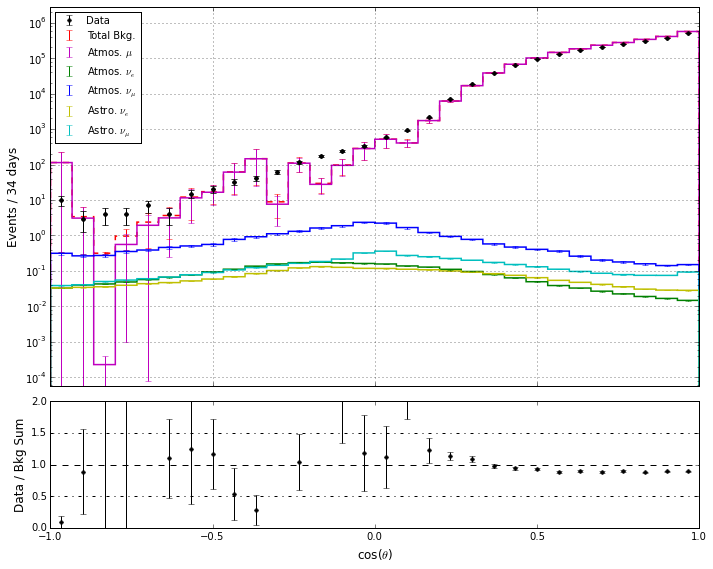

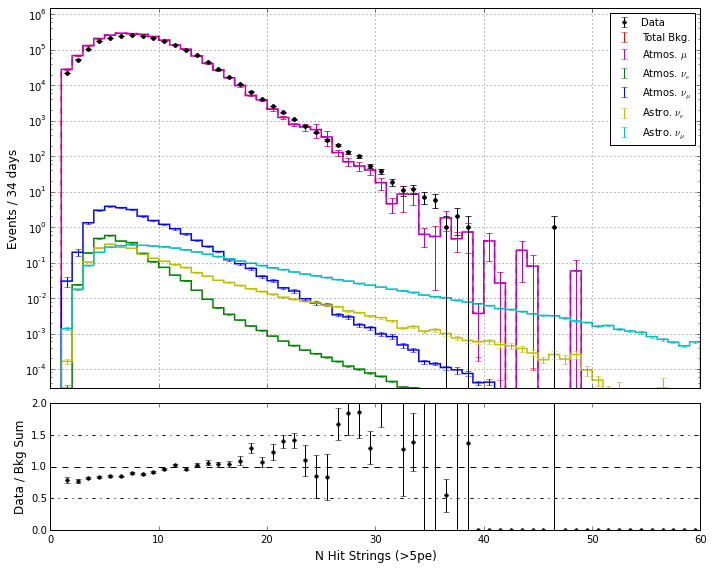

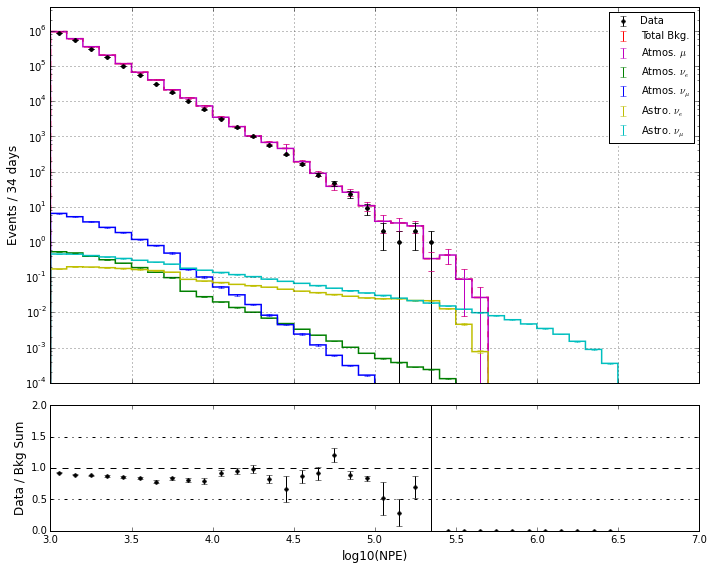

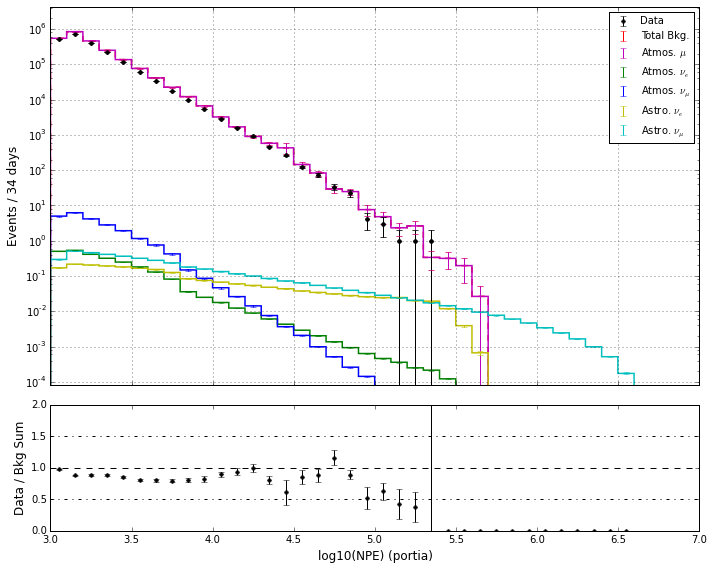

In [5]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    plt.savefig(savedir+'baseline/'+lims[3]+'.png')

In [6]:
# Cut away events with Nch < 300 and NPE < 3000
# effectively grabbing higher energy events

def hecut(dt):
    #return dt[ (dt['hm_nhit_doms'] >= 300) & (dt['log10(hs_q_tot_pulses)']>=np.log10(3000.))]
    return dt[ (dt['ndoms_5pe'] >= 120) & (dt['log10(hs_q_tot_pulses)']>=np.log10(3000.))]

dt_data = hecut(dt_data)
dt_numu = hecut(dt_numu)
dt_nue = hecut(dt_nue)
dt_cor = hecut(dt_cor)
dt_mc = hecut(dt_mc)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)


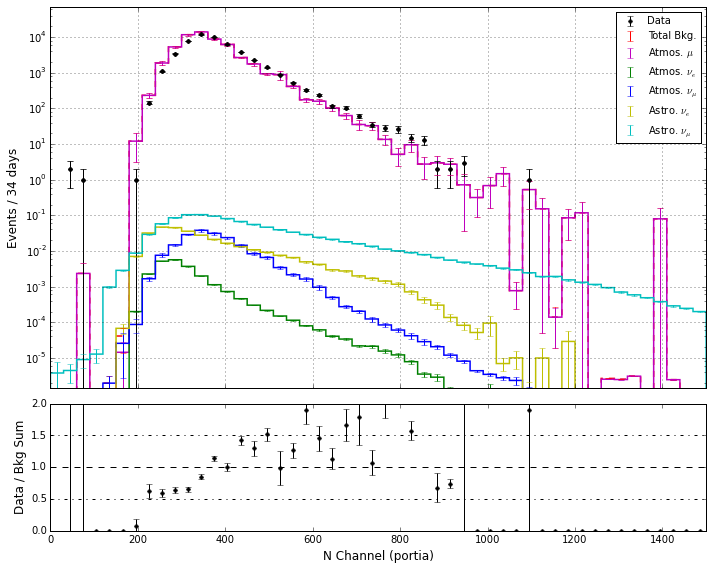

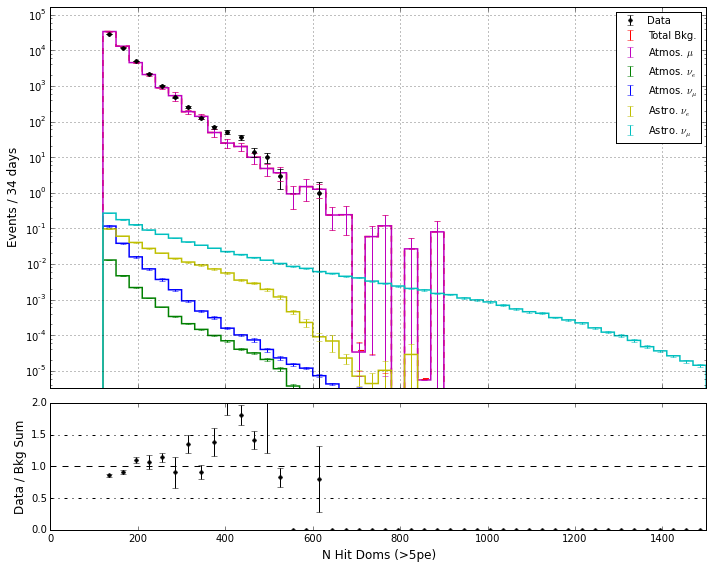

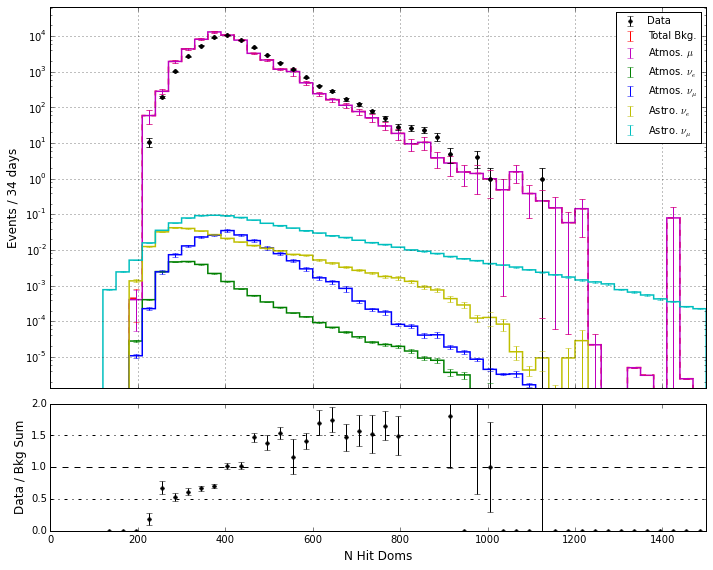

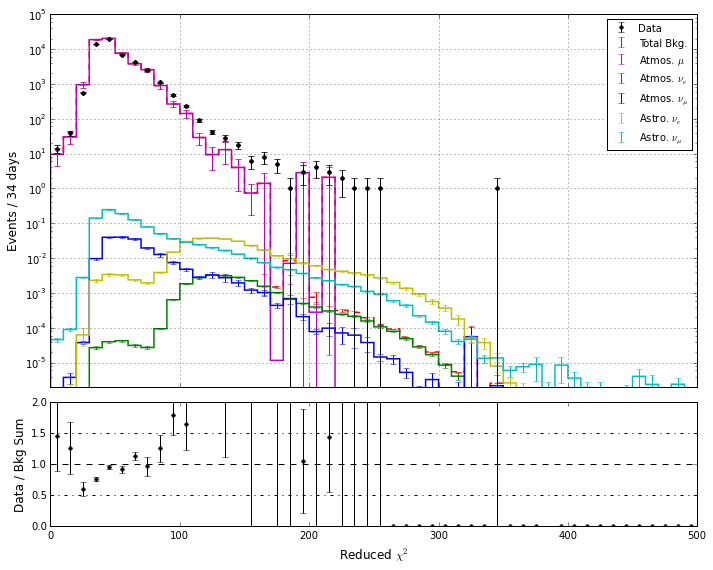

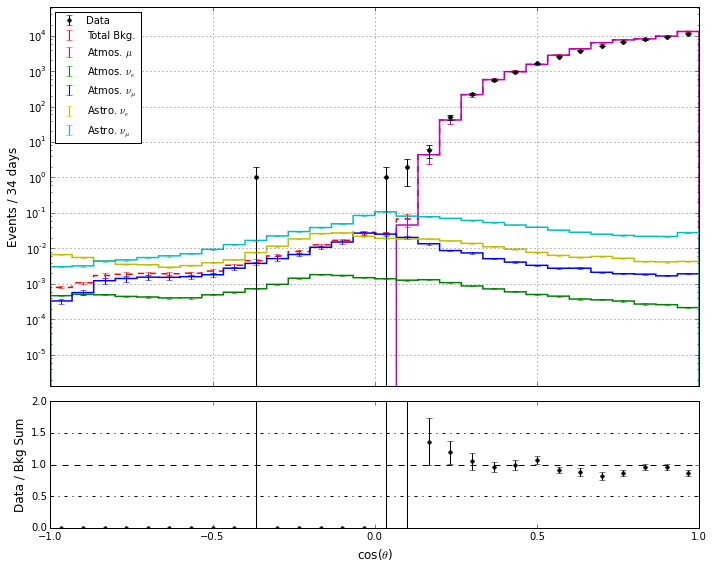

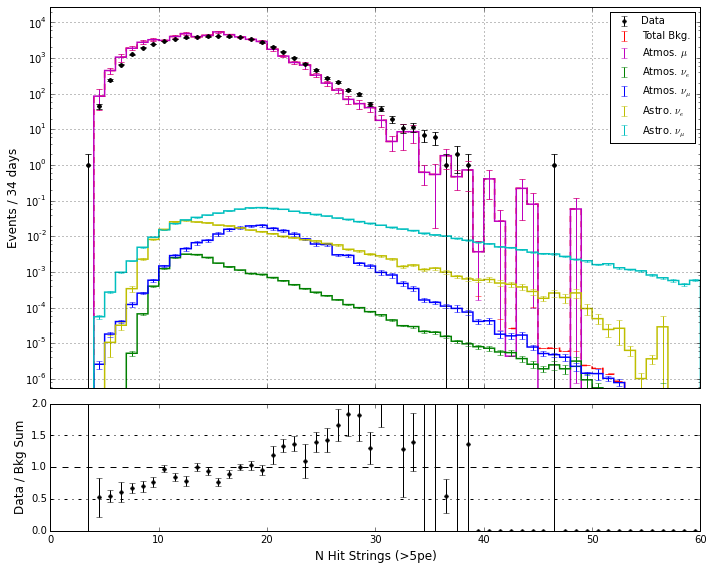

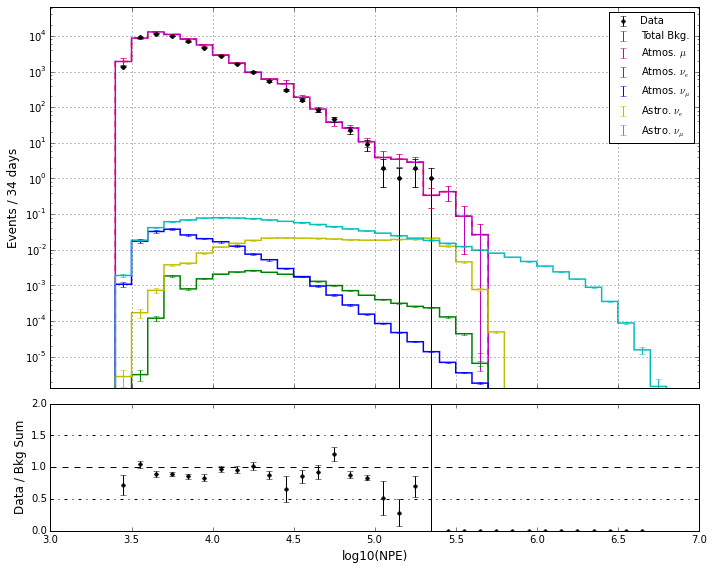

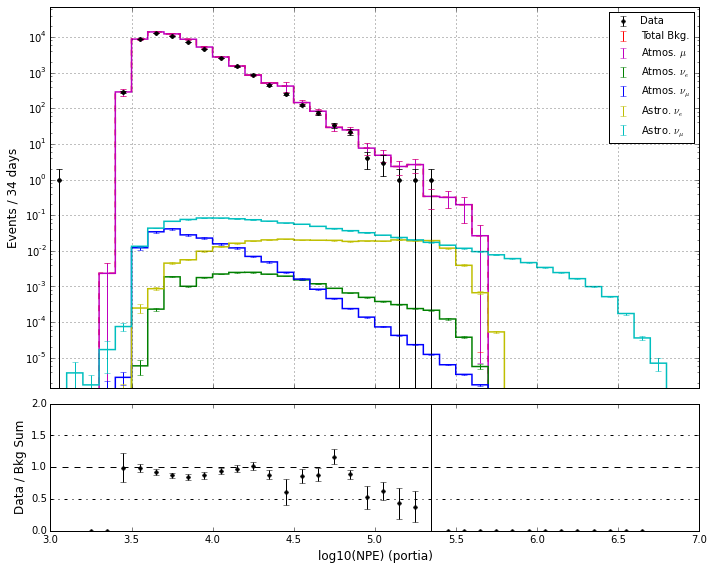

In [7]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    plt.savefig(savedir+'NchNPECut/'+lims[3]+'.png')

In [8]:
# Cut on improved line-fit fit quality

def fqcut(dt):
    return dt[ (dt['ImpLF_rchi2'] > 25) & (dt['ImpLF_rchi2'] < 80) ]

dt_data = fqcut(dt_data)
dt_numu = fqcut(dt_numu)
dt_nue = fqcut(dt_nue)
dt_cor = fqcut(dt_cor)
dt_mc = fqcut(dt_mc)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)

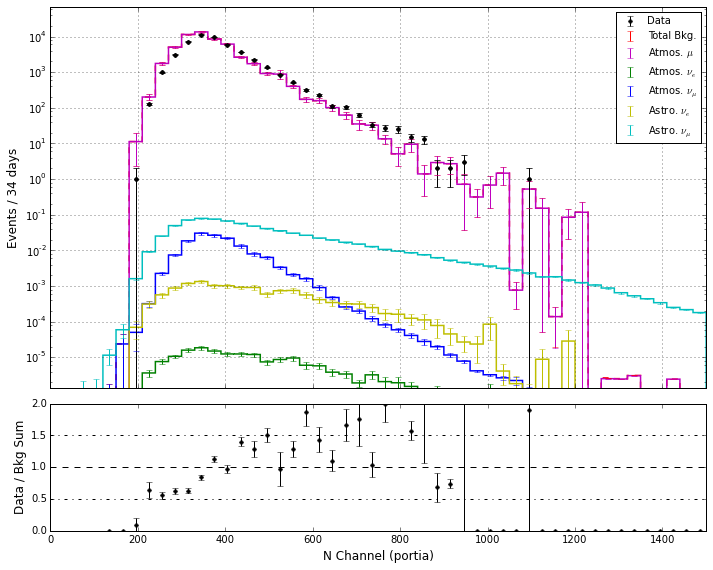

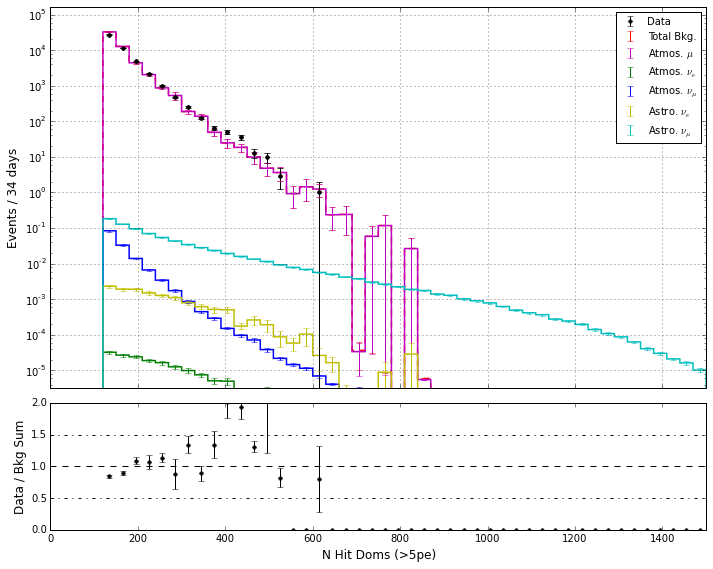

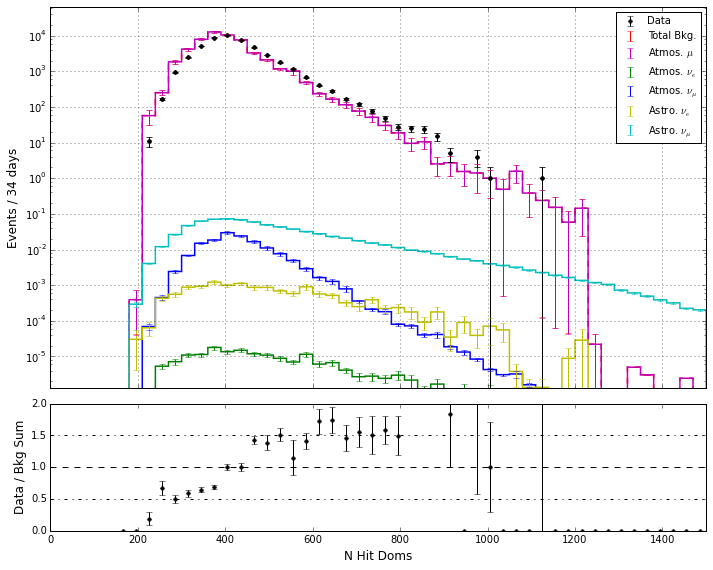

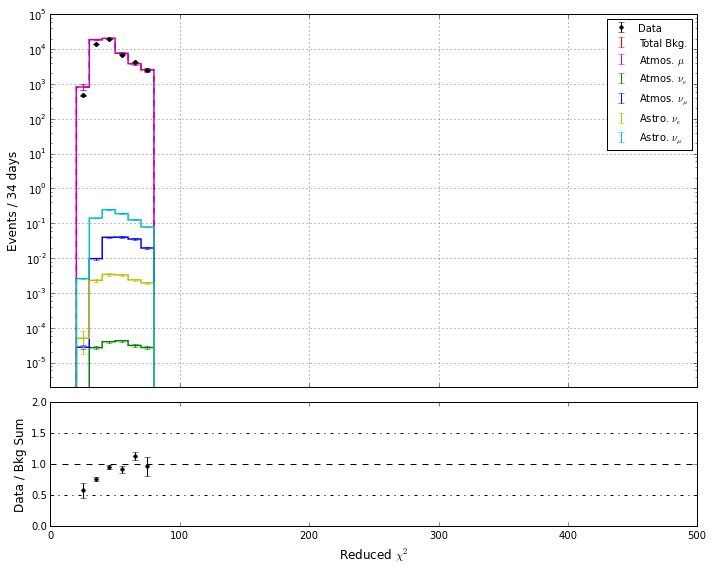

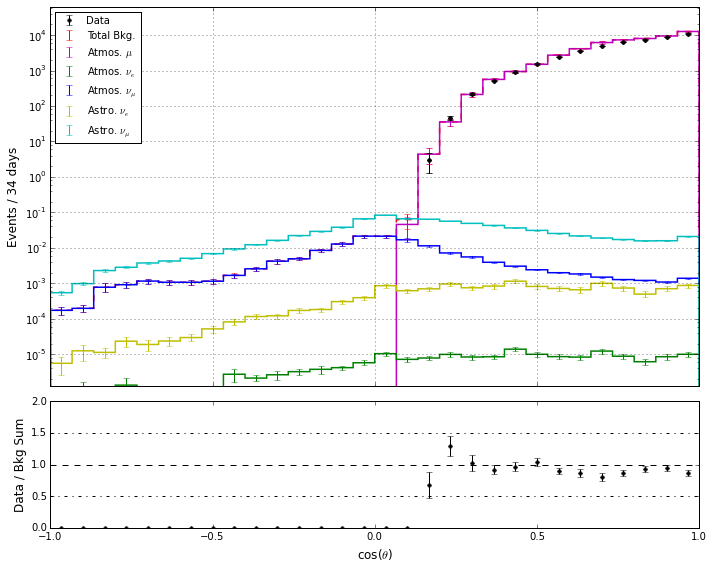

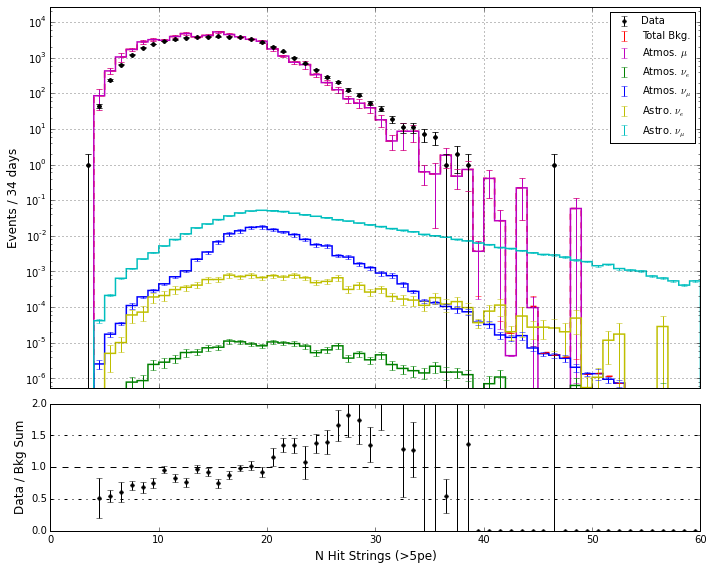

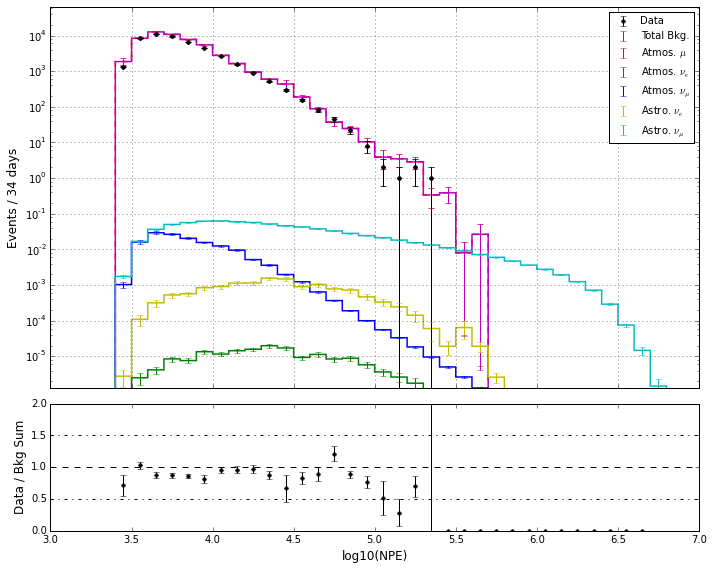

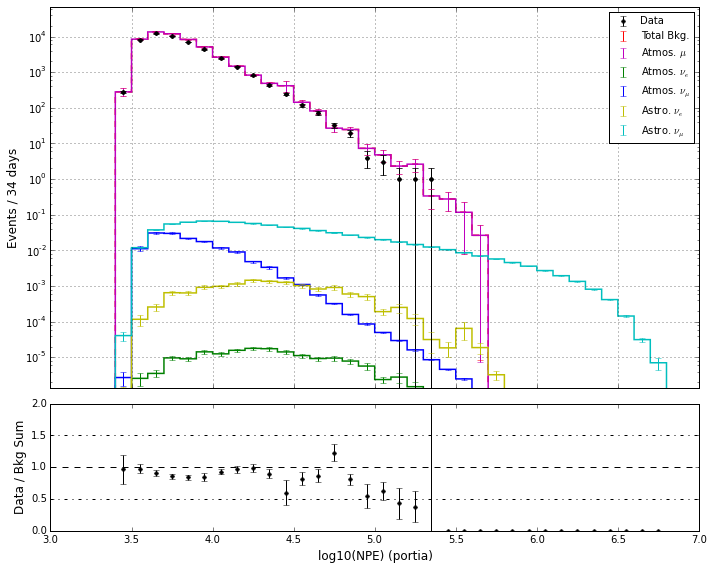

In [9]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    plt.savefig(savedir+'NchNPECut_FQcut/'+lims[3]+'.png')

In [10]:
# Print the rates from the L3 selection
for i in range(len(info['data'])):
    dt = info['data'][i]
    name = info['names'][i]
    w = info['weights'][i]
    
    print name,'\t',sum(dt[w]) / C.livetime

Data 	0.016006577543
Total Bkg. 	0.0179204882712
Atmos. $\mu$ 	0.0179204400115
Atmos. $\nu_{e}$ 	5.63263464682e-11
Atmos. $\nu_{\mu}$ 	4.82034582038e-08
Astro. $\nu_{e}$ 	4.46681022193e-09
Astro. $\nu_{\mu}$ 	2.6181516661e-07


In [36]:
branches = ['evtid','runid','cos(ImpLF_zen)','ImpLF_rchi2','log10(hs_q_tot_pulses)','ndoms_5pe','hm_nhit_doms']
dt_data[ dt_data['cos(ImpLF_zen)'] < 0][branches]

,evtid,runid,cos(ImpLF_zen),ImpLF_rchi2,log10(hs_q_tot_pulses),ndoms_5pe,hm_nhit_doms
892823,64513030,120860,-0.453681,51.258935,3.703571,103,212


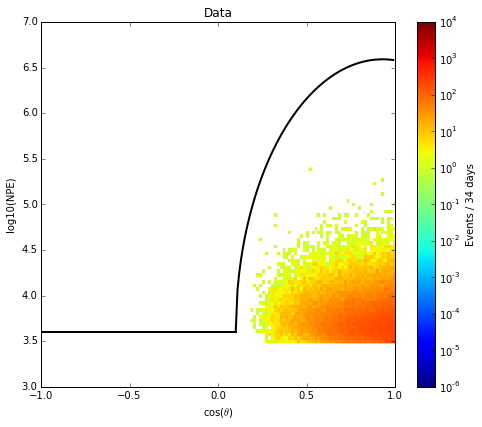

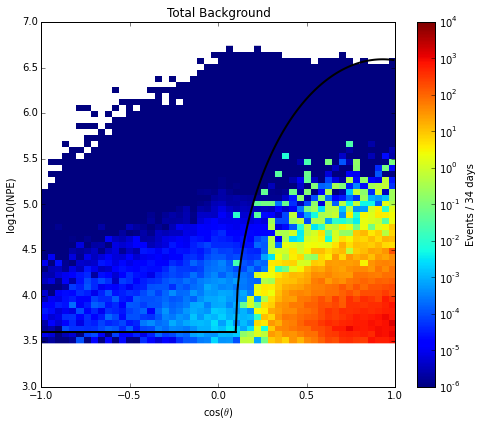

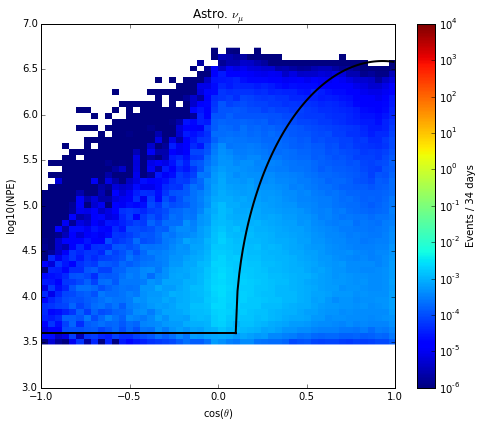

In [39]:
# Ok now we are down to the 2D cut and let's plot 
# that here for data, bkg, and signal 

info2d = {'data' : [dt_data, dt_mc, dt_numu],
          'w' : ['w','w','wE2'],
          'title' : ['Data','Total Background',r'Astro. $\nu_{\mu}$'],
          'sname' : ['data','totbkg','numusig']}

xval = 'cos(ImpLF_zen)'
yval = 'log10(hs_q_tot_pulses)'

nbins = 50
xmin  = -1
xmax  = 1
ymin  = 3
ymax  = 7
zmin  = 1e-6
zmax  = 1e4

# Add a method to draw the signal region cuts
def drawCuts(axis):
    axis.plot([-1,0.1], [3.6,3.6], c='black', lw=2,label='EHE Alert Selection')
    def f(x):
        return 3.6 + 2.99 * np.sqrt(np.fabs(1-np.power((x-0.93)/0.83,2)))
    step = 0.01
    x = np.arange(0.1,1,step)
    axis.plot(x,f(x),c='black',lw=2)

# Plot all three sets 
for i in range(len(info2d['data'])):
    dt = info2d['data'][i]
    w  = info2d['w'][i]
    title = info2d['title'][i]
    sname = info2d['sname'][i]
    
    fig, ax = plt.subplots(ncols=1,figsize=(7,6))
    ax.set_title(title)
    p_tool.ploth2(dt[xval].as_matrix(),
             dt[yval].as_matrix(),
             dt[w].as_matrix(), 
             r'cos($\theta$)',
             'log10(NPE)',
             C.lt_label,
             nbins,xmin,xmax,ymin,ymax,zmin,zmax,
             False)

    cb = plt.colorbar()
    cb.set_label(C.lt_label)
    drawCuts(ax)
    plt.savefig(savedir+'L3/'+sname+'_lognpe_coszen.png')

In [11]:
xval = 'cos(ImpLF_zen)'
yval = 'log10(hs_q_tot_pulses)'
def getdata(dt, threshold, a, b):
    y = dt[yval]
    x = dt[xval]
    down = (x >= 0.1) & (y >= threshold + b * np.sqrt(1-np.power((x-a-0.1)/a,2)))
    up   = (x<0.1) & (y >= threshold)
    return dt[ down | up]
def getSum(dt, threshold, a, b, w):
    temp = getdata(dt,threshold,a,b)
    return sum(temp[w]) * 365/34.7

In [12]:
for i in range(len(info['data'])):
    dt = info['data'][i]
    name = info['names'][i]
    w = info['weights'][i]
    print '%s : %.3f'%(name,getSum(dt,3.6,0.83,2.99,w))

Data : 0.000
Total Bkg. : 1.198
Atmos. $\mu$ : 0.326
Atmos. $\nu_{e}$ : 0.000
Atmos. $\nu_{\mu}$ : 0.871
Astro. $\nu_{e}$ : 0.032
Astro. $\nu_{\mu}$ : 3.962
